In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mnist_train = torchvision.datasets.MNIST(root='./data', train=True,
                                         transform=torchvision.transforms.ToTensor(),
                                         download=True)

In [ ]:
mnist_test = torchvision.datasets.MNIST(root='./data', train=False,
                                         transform=torchvision.transforms.ToTensor(),
                                         download=True)

**5. Show how you can visualize the images in the MINIST dataset and provide some
examples.**

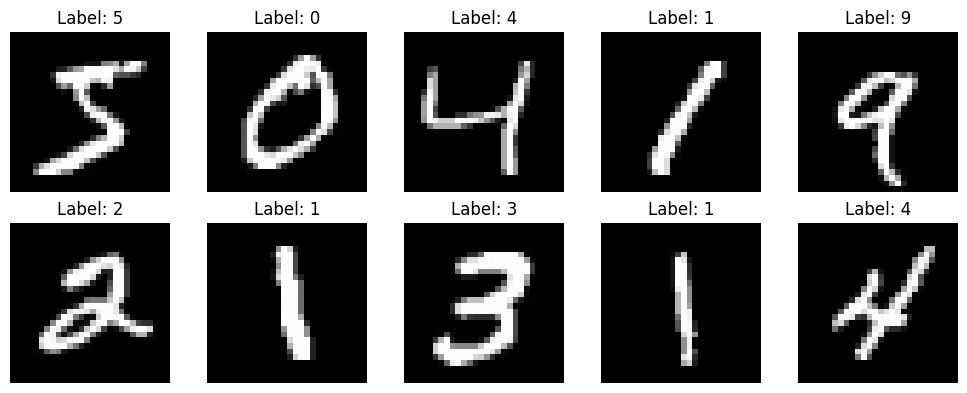

In [ ]:
import matplotlib.pyplot as plt

# Visualize training images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    img, label = mnist_train[i]
    ax.imshow(img.squeeze().numpy(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()



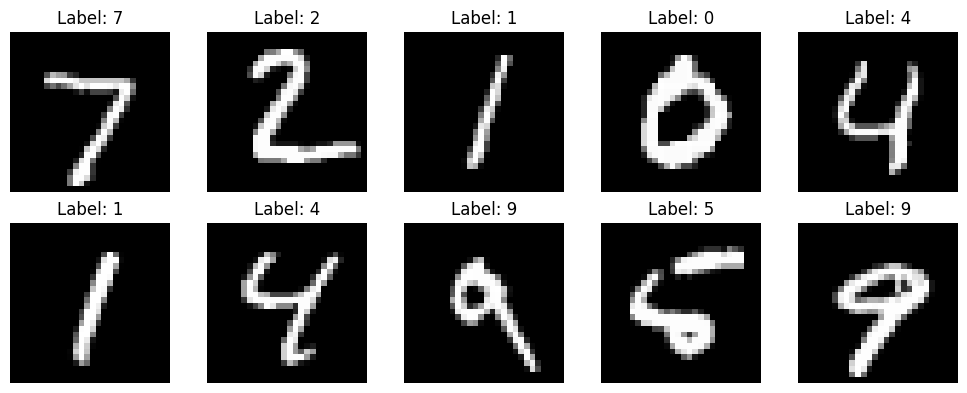

In [ ]:
# Visualize test images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    img, label = mnist_test[i]
    ax.imshow(img.squeeze().numpy(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()


**6-Write down the gradient ascent algorithm that allows to optimize the cost function.**

In [ ]:
# Gradient ascent algorithm
# Preprocess the data
# X train
X = np.array(mnist_train.data)
# Extract labels
y = np.array(mnist_train.targets)
# X test
X_test = np.array(mnist_test.data)

# Extract labels
y_test = np.array(mnist_test.targets)
X = X.reshape(X.shape[0], -1)  # Flatten the images
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoded vectors
num_classes = 10
num_features = X.shape[1]
num_samples = X.shape[0]

y_one_hot = np.eye(num_classes)[y]
y_test_one_hot = np.eye(num_classes)[y_test]

# Initialize model parameters
np.random.seed(0)
beta = np.random.randn(num_classes, num_features)
bias = np.zeros(num_classes)

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000
stopping_criterion = 0.001

num_iterations = 1000
for i in range(num_iterations):
    # Compute logits and probabilities
    logits = X.dot(beta.T) + bias
    probabilities = softmax(logits, axis=1)
    # Compute gradients
    d_beta = (X.T.dot(y_one_hot - probabilities)).T / num_samples
    d_bias = np.mean(y_one_hot - probabilities, axis=0)

    # Update parameters
    beta += learning_rate * d_beta
    bias += learning_rate * d_bias

    # Calculate current cost
    epsilon = 1e-10
    cost = -np.sum(y_one_hot * np.log(probabilities + epsilon)) / num_samples


In [ ]:
X.shape

(60000, 28, 28)

# 7
**7-1 Use the obtained algorithm to train a multi-class logistic regression classifier. Plot (1) the cost value (log-likelihood), (2) the training accuracy, and (3) the testing accuracy versus the number of iterations. Report your final testing accuracy, i.e. the fraction of test images that are correctly classified.**


Convergence reached. Stopping optimization.


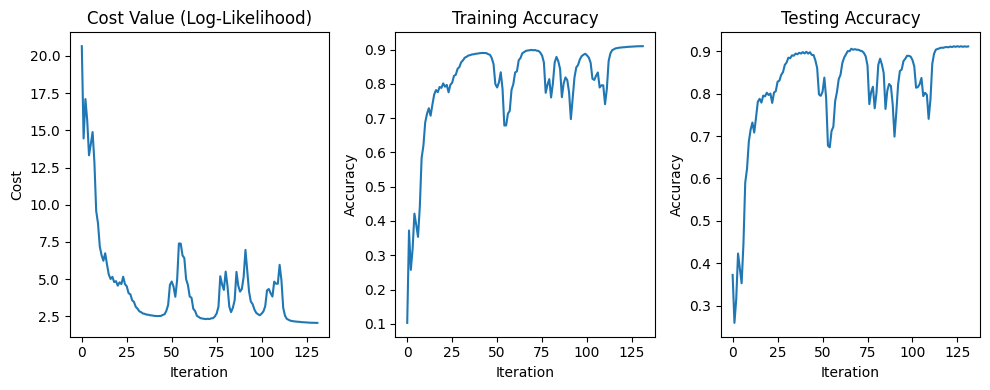

Final Testing Accuracy: 0.911


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

# Preprocess the data
X = X.reshape(X.shape[0], -1)  # Flatten the images
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoded vectors
num_classes = 10
num_features = X.shape[1]
num_samples = X.shape[0]

y_one_hot = np.eye(num_classes)[y]
y_test_one_hot = np.eye(num_classes)[y_test]

# Initialize model parameters
np.random.seed(0)
beta = np.random.randn(num_classes, num_features)
bias = np.zeros(num_classes)

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000
stopping_criterion = 0.001

# Initialize lists to store results
cost_values = []
training_accuracies = []
testing_accuracies = []

# Gradient ascent algorithm
for i in range(num_iterations):
    # Compute logits and probabilities
    logits = X.dot(beta.T) + bias
    probabilities = softmax(logits, axis=1)

    # Compute gradients
    d_beta = (X.T.dot(y_one_hot - probabilities)).T / num_samples

    d_bias = np.mean(y_one_hot - probabilities, axis=0)

    # Update parameters
    beta += learning_rate * d_beta
    bias += learning_rate * d_bias

    # Calculate current cost
    #cost = -np.sum(y_one_hot * np.log(probabilities)) / num_samples
    epsilon = 1e-10
    cost = -np.sum(y_one_hot * np.log(probabilities + epsilon)) / num_samples

    cost_values.append(cost)

    # Calculate training accuracy
    y_pred_train = np.argmax(probabilities, axis=1)
    training_accuracy = np.mean(y_pred_train == y)
    training_accuracies.append(training_accuracy)

    # Calculate testing accuracy
    logits_test = X_test.dot(beta.T) + bias
    probabilities_test = softmax(logits_test, axis=1)
    y_pred_test = np.argmax(probabilities_test, axis=1)
    testing_accuracy = np.mean(y_pred_test == y_test)
    testing_accuracies.append(testing_accuracy)

    # Check stopping criterion
    if i > 0 and abs(cost_values[i] - cost_values[i-1]) < stopping_criterion:
        print("Convergence reached. Stopping optimization.")
        break

# Plot the results
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.plot(range(len(cost_values)), cost_values)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Value (Log-Likelihood)')

plt.subplot(1, 3, 2)
plt.plot(range(len(training_accuracies)), training_accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.subplot(1, 3, 3)
plt.plot(range(len(testing_accuracies)), testing_accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy')

plt.tight_layout()
plt.show()

# Report the final testing accuracy
final_testing_accuracy = testing_accuracies[-1]
print("Final Testing Accuracy:", final_testing_accuracy)


7-2 Choose a suitable **learning rate**(i.e. stepsize) of the gradient ascent algorithm. Note that as rule of thumb your learning rate cannot be too large
otherwise your cost function will increase only for the first few iterations.

Testing accuracy stabilized for learning rate 0.001. Stopping optimization.
Convergence reached for learning rate 0.01. Stopping optimization.
Convergence reached for learning rate 0.1. Stopping optimization.
Testing accuracy stabilized for learning rate 1.0. Stopping optimization.


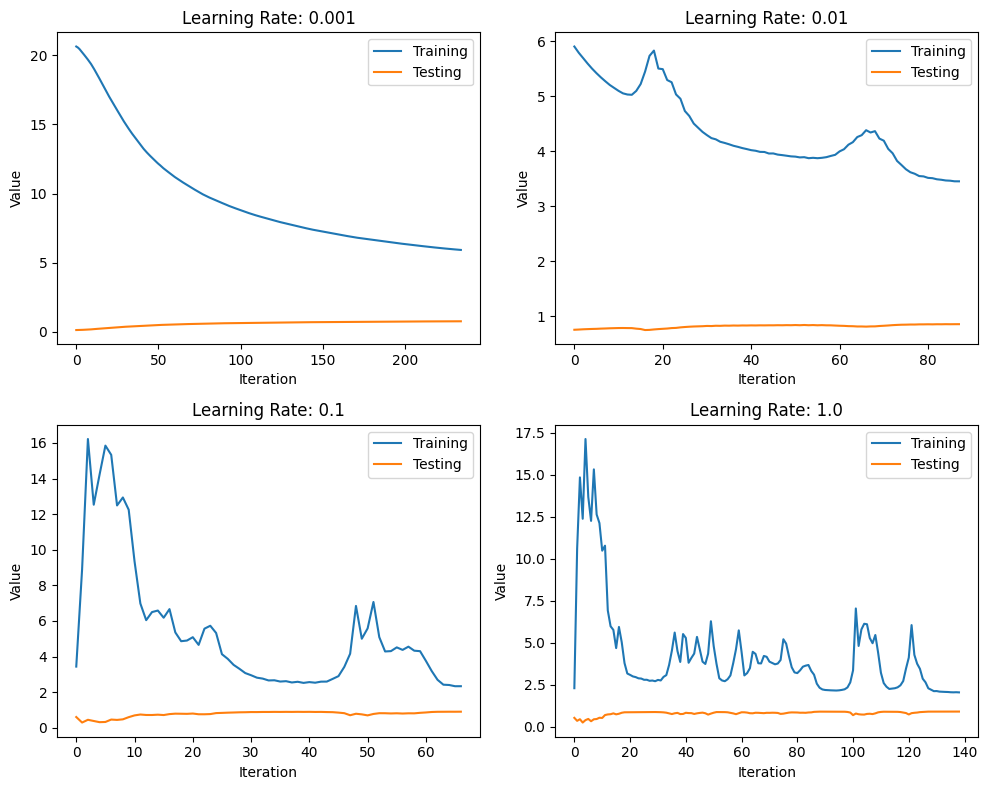

Final Testing Accuracy for learning rate 0.001: 0.7471
Final Testing Accuracy for learning rate 0.01: 0.8532
Final Testing Accuracy for learning rate 0.1: 0.9056
Final Testing Accuracy for learning rate 1.0: 0.9127


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

# Preprocess the data
X = X.reshape(X.shape[0], -1)  # Flatten the images
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoded vectors
num_classes = 10
num_features = X.shape[1]
num_samples = X.shape[0]

y_one_hot = np.eye(num_classes)[y]
y_test_one_hot = np.eye(num_classes)[y_test]

# Initialize model parameters
np.random.seed(0)
beta = np.random.randn(num_classes, num_features)
bias = np.zeros(num_classes)

# Set hyperparameters
learning_rates = [0.001, 0.01, 0.1, 1.0]
num_iterations = 1000
stopping_criterion = 0.001
accuracy_stability_threshold = 0.001
accuracy_stability_epochs = 10

# Initialize lists to store results for each learning rate
cost_values_list = []
training_accuracies_list = []
testing_accuracies_list = []

for learning_rate in learning_rates:
    # Initialize lists for the current learning rate
    cost_values = []
    training_accuracies = []
    testing_accuracies = []

    # Gradient ascent algorithm
    for i in range(num_iterations):
        # Compute logits and probabilities
        logits = X.dot(beta.T) + bias
        probabilities = softmax(logits, axis=1)

        # Compute gradients
        d_beta = (X.T.dot(y_one_hot - probabilities)).T / num_samples
        d_bias = np.mean(y_one_hot - probabilities, axis=0)

        # Update parameters
        beta += learning_rate * d_beta
        bias += learning_rate * d_bias

        # Calculate current cost
        epsilon = 1e-10
        cost = -np.sum(y_one_hot * np.log(probabilities + epsilon)) / num_samples
        cost_values.append(cost)

        # Calculate training accuracy
        y_pred_train = np.argmax(probabilities, axis=1)
        training_accuracy = np.mean(y_pred_train == y)
        training_accuracies.append(training_accuracy)

        # Calculate testing accuracy
        logits_test = X_test.dot(beta.T) + bias
        probabilities_test = softmax(logits_test, axis=1)
        y_pred_test = np.argmax(probabilities_test, axis=1)
        testing_accuracy = np.mean(y_pred_test == y_test)
        testing_accuracies.append(testing_accuracy)

        # Check stopping criterion based on cost values
        if i > 0 and abs(cost_values[i] - cost_values[i-1]) < stopping_criterion:
            print(f"Convergence reached for learning rate {learning_rate}. Stopping optimization.")
            break

        # Check stopping criterion based on testing accuracy stability
        if i > accuracy_stability_epochs:
            recent_testing_accuracies = testing_accuracies[-accuracy_stability_epochs:]
            if np.std(recent_testing_accuracies) < accuracy_stability_threshold:
                print(f"Testing accuracy stabilized for learning rate {learning_rate}. Stopping optimization.")
                break

    # Store the results for the current learning rate
    cost_values_list.append(cost_values)
    training_accuracies_list.append(training_accuracies)
    testing_accuracies_list.append(testing_accuracies)

# Plot the results for each learning rate
num_subplots = len(learning_rates)
num_rows = 2
num_cols = num_subplots // num_rows
if num_subplots % num_rows != 0:
    num_cols += 1

plt.figure(figsize=(10, 8))

for i, learning_rate in enumerate(learning_rates):
    plt.subplot(num_rows, num_cols, i+1)
    plt.plot(range(len(cost_values_list[i])), cost_values_list[i], label='Training')
    plt.plot(range(len(testing_accuracies_list[i])), testing_accuracies_list[i], label='Testing')
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title(f'Learning Rate: {learning_rate}')
    plt.legend()

plt.tight_layout()
plt.show()

# Report the final testing accuracy for each learning rate
for i, learning_rate in enumerate(learning_rates):
    final_testing_accuracy = testing_accuracies_list[i][-1]
    print(f"Final Testing Accuracy for learning rate {learning_rate}: {final_testing_accuracy}")


# 7-3 You also need to choose a suitable **stopping criterion**. You might use the number of iterations, the decrease of the objective value, or the maximum of the Euclidean norms of the gradient with respect to each βk. You might also stop the optimization when the testing accuracy is stable.


Testing accuracy stabilized for stopping criterion 0.0001. Stopping optimization.
Testing accuracy stabilized for stopping criterion 0.001. Stopping optimization.
Convergence reached for stopping criterion 0.01. Stopping optimization.
Convergence reached for stopping criterion 0.1. Stopping optimization.


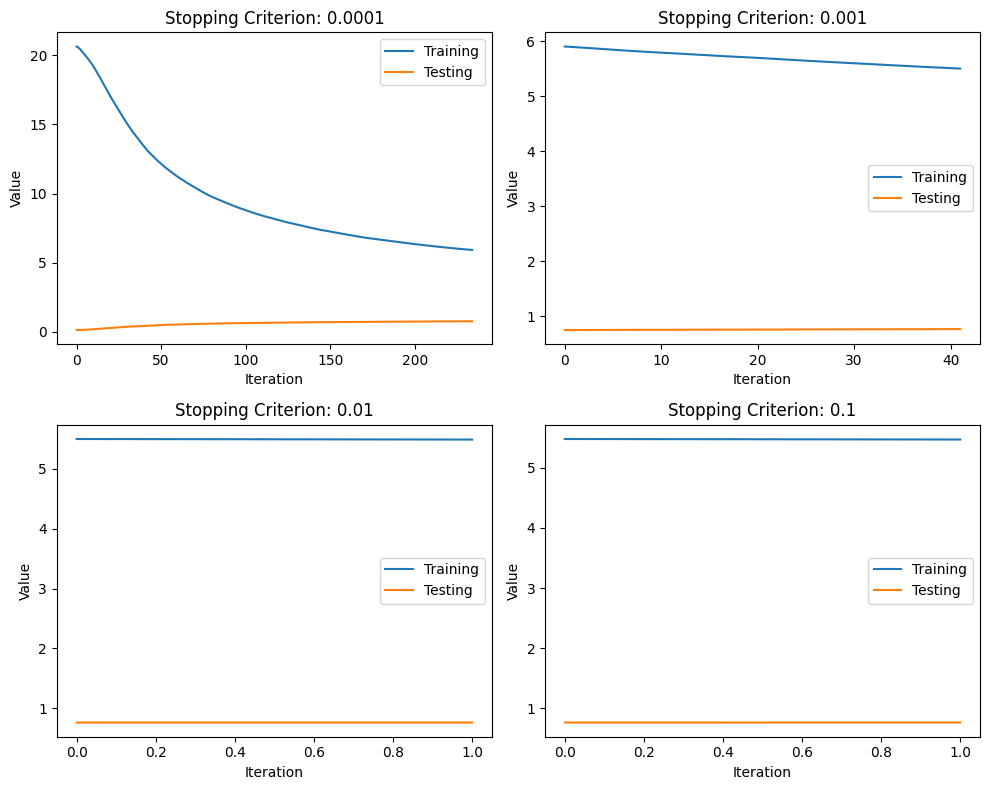

Final Testing Accuracy for stopping criterion 0.0001: 0.7471
Final Testing Accuracy for stopping criterion 0.001: 0.7639
Final Testing Accuracy for stopping criterion 0.01: 0.7642
Final Testing Accuracy for stopping criterion 0.1: 0.7651


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

# Preprocess the data
X = X.reshape(X.shape[0], -1)  # Flatten the images
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoded vectors
num_classes = 10
num_features = X.shape[1]
num_samples = X.shape[0]

y_one_hot = np.eye(num_classes)[y]
y_test_one_hot = np.eye(num_classes)[y_test]

# Initialize model parameters
np.random.seed(0)
beta = np.random.randn(num_classes, num_features)
bias = np.zeros(num_classes)

# Set hyperparameters
learning_rate = 0.001
num_iterations = 1000
stopping_criteria = [0.0001, 0.001, 0.01, 0.1]
accuracy_stability_threshold = 0.001
accuracy_stability_epochs = 10

# Initialize lists to store results for each stopping criterion
cost_values_list = []
training_accuracies_list = []
testing_accuracies_list = []

for stopping_criterion in stopping_criteria:
    # Initialize lists for the current stopping criterion
    cost_values = []
    training_accuracies = []
    testing_accuracies = []

    # Gradient ascent algorithm
    for i in range(num_iterations):
        # Compute logits and probabilities
        logits = X.dot(beta.T) + bias
        probabilities = softmax(logits, axis=1)

        # Compute gradients
        d_beta = (X.T.dot(y_one_hot - probabilities)).T / num_samples
        d_bias = np.mean(y_one_hot - probabilities, axis=0)

        # Update parameters
        beta += learning_rate * d_beta
        bias += learning_rate * d_bias

        # Calculate current cost
        epsilon = 1e-10
        cost = -np.sum(y_one_hot * np.log(probabilities + epsilon)) / num_samples
        cost_values.append(cost)

        # Calculate training accuracy
        y_pred_train = np.argmax(probabilities, axis=1)
        training_accuracy = np.mean(y_pred_train == y)
        training_accuracies.append(training_accuracy)

        # Calculate testing accuracy
        logits_test = X_test.dot(beta.T) + bias
        probabilities_test = softmax(logits_test, axis=1)
        y_pred_test = np.argmax(probabilities_test, axis=1)
        testing_accuracy = np.mean(y_pred_test == y_test)
        testing_accuracies.append(testing_accuracy)

        # Check stopping criterion based on cost values
        if i > 0 and abs(cost_values[i] - cost_values[i-1]) < stopping_criterion:
            print(f"Convergence reached for stopping criterion {stopping_criterion}. Stopping optimization.")
            break

        # Check stopping criterion based on testing accuracy stability
        if i > accuracy_stability_epochs:
            recent_testing_accuracies = testing_accuracies[-accuracy_stability_epochs:]
            if np.std(recent_testing_accuracies) < accuracy_stability_threshold:
                print(f"Testing accuracy stabilized for stopping criterion {stopping_criterion}. Stopping optimization.")
                break

    # Store the results for the current stopping criterion
    cost_values_list.append(cost_values)
    training_accuracies_list.append(training_accuracies)
    testing_accuracies_list.append(testing_accuracies)

# Plot the results for each stopping criterion
num_subplots = len(stopping_criteria)
num_rows = 2
num_cols = num_subplots // num_rows
if num_subplots % num_rows != 0:
    num_cols += 1

plt.figure(figsize=(10, 8))

for i, stopping_criterion in enumerate(stopping_criteria):
    plt.subplot(num_rows, num_cols, i+1)
    plt.plot(range(len(cost_values_list[i])), cost_values_list[i], label='Training')
    plt.plot(range(len(testing_accuracies_list[i])), testing_accuracies_list[i], label='Testing')
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title(f'Stopping Criterion: {stopping_criterion}')
    plt.legend()

plt.tight_layout()
plt.show()

# Report the final testing accuracy for each stopping criterion
for i, stopping_criterion in enumerate(stopping_criteria):
    final_testing_accuracy = testing_accuracies_list[i][-1]
    print(f"Final Testing Accuracy for stopping criterion {stopping_criterion}: {final_testing_accuracy}")


8-You must perform the experiment for values λ = 1, 10, 100, 1000 of the **regularization**
and report the final testing accuracies for each λ in a table. What can you conclude
from the above experiment about the relationship between the regularization weight
and the prediction performance?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

# Preprocess the data
X = X.reshape(X.shape[0], -1)  # Flatten the images
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoded vectors
num_classes = 10
num_features = X.shape[1]
num_samples = X.shape[0]

y_one_hot = np.eye(num_classes)[y]
y_test_one_hot = np.eye(num_classes)[y_test]

# Initialize model parameters
np.random.seed(0)
beta = np.random.randn(num_classes, num_features)
bias = np.zeros(num_classes)

# Set hyperparameters
learning_rate = 0.001
num_iterations = 1000
stopping_criterion = 0.001
regularization_weights = [1, 10, 100, 1000]
accuracy_stability_threshold = 0.001
accuracy_stability_epochs = 10

# Initialize lists to store results for each regularization weight
cost_values_list = []
training_accuracies_list = []
testing_accuracies_list = []

for regularization_weight in regularization_weights:
    # Initialize lists for the current regularization weight
    cost_values = []
    training_accuracies = []
    testing_accuracies = []

    # Gradient ascent algorithm
    for i in range(num_iterations):
        # Compute logits and probabilities
        logits = X.dot(beta.T) + bias
        probabilities = softmax(logits, axis=1)

        # Compute gradients
        d_beta = (X.T.dot(y_one_hot - probabilities)).T / num_samples - regularization_weight * beta / num_samples
        d_bias = np.mean(y_one_hot - probabilities, axis=0)

        # Update parameters
        beta += learning_rate * d_beta
        bias += learning_rate * d_bias

        # Calculate current cost
        epsilon = 1e-10
        cost = -np.sum(y_one_hot * np.log(probabilities + epsilon)) / num_samples+ regularization_weight * np.sum(beta**2) / 2
        cost_values.append(cost)

        # Calculate training accuracy
        y_pred_train = np.argmax(probabilities, axis=1)
        training_accuracy = np.mean(y_pred_train == y)
        training_accuracies.append(training_accuracy)

        # Calculate testing accuracy
        logits_test = X_test.dot(beta.T) + bias
        probabilities_test = softmax(logits_test, axis=1)
        y_pred_test = np.argmax(probabilities_test, axis=1)
        testing_accuracy = np.mean(y_pred_test == y_test)
        testing_accuracies.append(testing_accuracy)

        # Check stopping criterion based on cost values
        if i > 0 and abs(cost_values[i] - cost_values[i-1]) < stopping_criterion:
            print(f"Convergence reached for regularization weight {regularization_weight}. Stopping optimization.")
            break

        # Check stopping criterion based on testing accuracy stability
        if i > accuracy_stability_epochs:
            recent_testing_accuracies = testing_accuracies[-accuracy_stability_epochs:]
            if np.std(recent_testing_accuracies) < accuracy_stability_threshold:
                print(f"Testing accuracy stabilized for regularization weight {regularization_weight}. Stopping optimization.")
                break

    # Store the results for the current regularization weight
    cost_values_list.append(cost_values)
    training_accuracies_list.append(training_accuracies)
    testing_accuracies_list.append(testing_accuracies)

# Report the final testing accuracy for each regularization weight
print("Final Testing Accuracies:")
print("-------------------------")
print("| Regularization Weight | Testing Accuracy |")
print("|-----------------------|------------------|")
for i, regularization_weight in enumerate(regularization_weights):
    final_testing_accuracy = testing_accuracies_list[i][-1] #== max(testing_accuracies_list[i])
    print(f"| {regularization_weight:22.2f} | {final_testing_accuracy:16.4f} |")
print("-------------------------")


Testing accuracy stabilized for regularization weight 1. Stopping optimization.
Testing accuracy stabilized for regularization weight 10. Stopping optimization.
Testing accuracy stabilized for regularization weight 100. Stopping optimization.
Testing accuracy stabilized for regularization weight 1000. Stopping optimization.
Final Testing Accuracies:
-------------------------
| Regularization Weight | Testing Accuracy |
|-----------------------|------------------|
|                   1.00 |           0.7471 |
|                  10.00 |           0.7639 |
|                 100.00 |           0.7669 |
|                1000.00 |           0.7729 |
-------------------------
